# Predicting House Prices Using Genetic Algorithm Optimization

<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [2]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
y = training["SalePrice"]

test_id = test["Id"]

training.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
training.info()
print()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

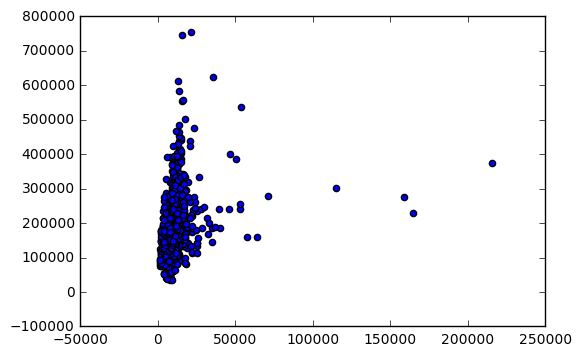

In [8]:
plt.scatter(training["LotArea"], training["SalePrice"])
plt.show()

### Feature Engineering (Kinda)

In [4]:
training = training.drop(["Id","SalePrice"],axis=1)
test = test.drop(["Id"],axis=1)
for col in list(training.columns.values):
    label_dict = {}
#     if training[col].dtype == int or training[col].dtype == float:
#         training[col] = training[col].fillna(training[col].mean())
#         training[col] = (training[col] - training[col].mean())/training[col].std()
        
#         test[col] = test[col].fillna(test[col].mean())
#         test[col] = (test[col] - test[col].mean())/test[col].std()
    
    if training[col].dtype == object:
        #training = training.drop([col],axis = 1)
        #test = test.drop([col],axis = 1)
        
        num = 0
        for i in list(training[col]):
            if not (pd.isnull(i)):
                if not(i in label_dict):
                    label_dict[i] = num
                    num+=1
        training[col] = training[col].map(label_dict)
        test[col] = test[col].map(label_dict)
    
    training[col] = training[col].fillna(training[col].mean())
    if not col=="SalePrice":
        test[col] = test[col].fillna(test[col].mean())
    
    
#     elif pd.isnull(training[col]).any():
#         training[col] = training[col].fillna(training[col].mean())
#         test[col] = test[col].fillna(test[col].mean())
    
#     if pd.isnull(test[col]).any():
#         test[col] = test[col].fillna(test[col].mean())


            
    
             
training.info()
print("\n\n\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null float64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
M

In [5]:
training.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,65.000000,8450,0,0.450549,0,0,0,0,...,0,0,1.142857,0.729537,0.166667,0,2,2008,0,0
1,20,0,80.000000,9600,0,0.450549,0,0,0,1,...,0,0,1.142857,0.729537,0.166667,0,5,2007,0,0
2,60,0,68.000000,11250,0,0.450549,1,0,0,0,...,0,0,1.142857,0.729537,0.166667,0,9,2008,0,0
3,70,0,60.000000,9550,0,0.450549,1,0,0,2,...,0,0,1.142857,0.729537,0.166667,0,2,2006,0,1
4,60,0,84.000000,14260,0,0.450549,1,0,0,1,...,0,0,1.142857,0.729537,0.166667,0,12,2008,0,0
5,50,0,85.000000,14115,0,0.450549,1,0,0,0,...,0,0,1.142857,0.000000,0.000000,700,10,2009,0,0
6,20,0,75.000000,10084,0,0.450549,0,0,0,0,...,0,0,1.142857,0.729537,0.166667,0,8,2007,0,0
7,60,0,70.049958,10382,0,0.450549,1,0,0,2,...,0,0,1.142857,0.729537,0.000000,350,11,2009,0,0
8,50,1,51.000000,6120,0,0.450549,0,0,0,0,...,0,0,1.142857,0.729537,0.166667,0,4,2008,0,1
9,190,0,50.000000,7420,0,0.450549,0,0,0,2,...,0,0,1.142857,0.729537,0.166667,0,1,2008,0,0


In [6]:
X = training.as_matrix(columns=[training.columns.values]).astype(float)
y = np.array(y).astype(float)

#Training Values (75/25 split)
X_train = X[0:1100,:] 
y_train = y[0:1100]

#Cross Validation Values
X_cv = X[1100:,:] 
y_cv = y[1100:]

X_test = test.as_matrix(columns=[test.columns.values])

### Use Genetic Algorithm to Decide on ML Algorithm and Optimize Hyperparameters
Using <a href='https://github.com/rhiever/tpot'>tpot</a>

In [7]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_cv, y_cv))

Version 0.6.8 of tpot is outdated. Version 0.7.0 was released Wednesday March 22, 2017.


Generation 1 - Current best internal CV score: 907685135.7569236


Generation 2 - Current best internal CV score: 907685135.7569236


Generation 3 - Current best internal CV score: 907685135.7569236


Generation 4 - Current best internal CV score: 746506832.9240814


Generation 5 - Current best internal CV score: 726092443.0945641



Best pipeline: ExtraTreesRegressor(ElasticNet(ElasticNet(input_matrix, 0.87, 0.26000000000000001), 0.19, 0.90000000000000002), 0.84999999999999998)
918817724.235


In [8]:
tpot.export('tpot_house_pred.py')

In [9]:
print(tpot.score(X_train, y_train))

0.0


### Import TPOT Exported Program

In [10]:
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer

# # NOTE: Make sure that the class is labeled 'class' in the data file
# tpot_data = np.recfromcsv('C:\Users\Tom\Documents\University\Machine Learning\Jupyter ML\Kaggle House Prices\trainClass.csv', delimiter=',', dtype=np.float64)
# features = np.delete(tpot_data.view(np.float64).reshape(tpot_data.size, -1), tpot_data.dtype.names.index('class'), axis=1)
# training_features, testing_features, training_classes, testing_classes = \
#     train_test_split(features, tpot_data['class'], random_state=42)

exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(lambda X: X),
        FunctionTransformer(lambda X: X)
    ),
    make_union(VotingClassifier([("est", RandomForestRegressor(n_estimators=500))]), FunctionTransformer(lambda X: X)),
    LassoLarsCV(normalize=False)
)

exported_pipeline.fit(X, y)
results = exported_pipeline.predict(X_test)



C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.000e+06, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.786e+06, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=1.198e+06, with an active set of 10 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
C:\Users\Tom\Anaconda3\lib\site-packages\sklear

In [11]:
submission_svm = pd.DataFrame({
        "Id": test_id,
        "SalePrice": results
    })
submission_svm.to_csv('house_tpot.csv', index=False)